<a href="https://colab.research.google.com/github/SarraBenHamad/AI-Powered-Predictive-Maintenance-for-Industrial-Equipment-TwiseNight-AI-challenge/blob/main/TwiseNight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sarrabenhamad","key":"cc088b7bc4b44ca72b52a54901decbf6"}'}

In [ ]:
!kaggle datasets download -d dnkumars/industrial-equipment-monitoring-dataset

Dataset URL: https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset
License(s): apache-2.0
  0% 0.00/291k [00:00<?, ?B/s]
100% 291k/291k [00:00<00:00, 57.7MB/s]


In [ ]:
!unzip industrial-equipment-monitoring-dataset.zip -d /content/industrial-equipment-monitoring-dataset


Archive:  industrial-equipment-monitoring-dataset.zip
  inflating: /content/industrial-equipment-monitoring-dataset/equipment_anomaly_data.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


df = pd.read_csv("/content/industrial-equipment-monitoring-dataset/equipment_anomaly_data.csv")

# Display the first few rows of the dataset
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [ ]:
# Check for missing values
df.isnull().sum()

,0
temperature,0
pressure,0
vibration,0
humidity,0
equipment,0
location,0
faulty,0


In [ ]:
# Summary statistics
df.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


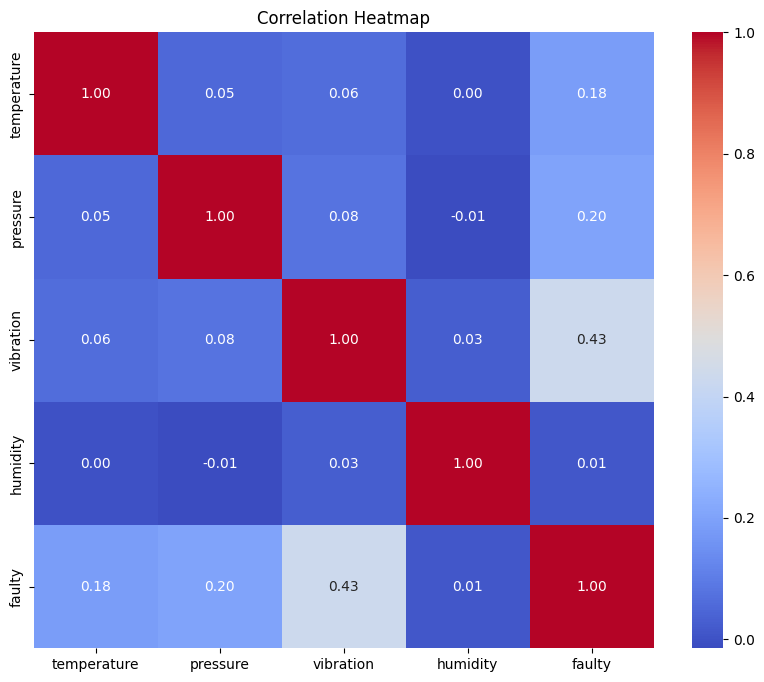

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

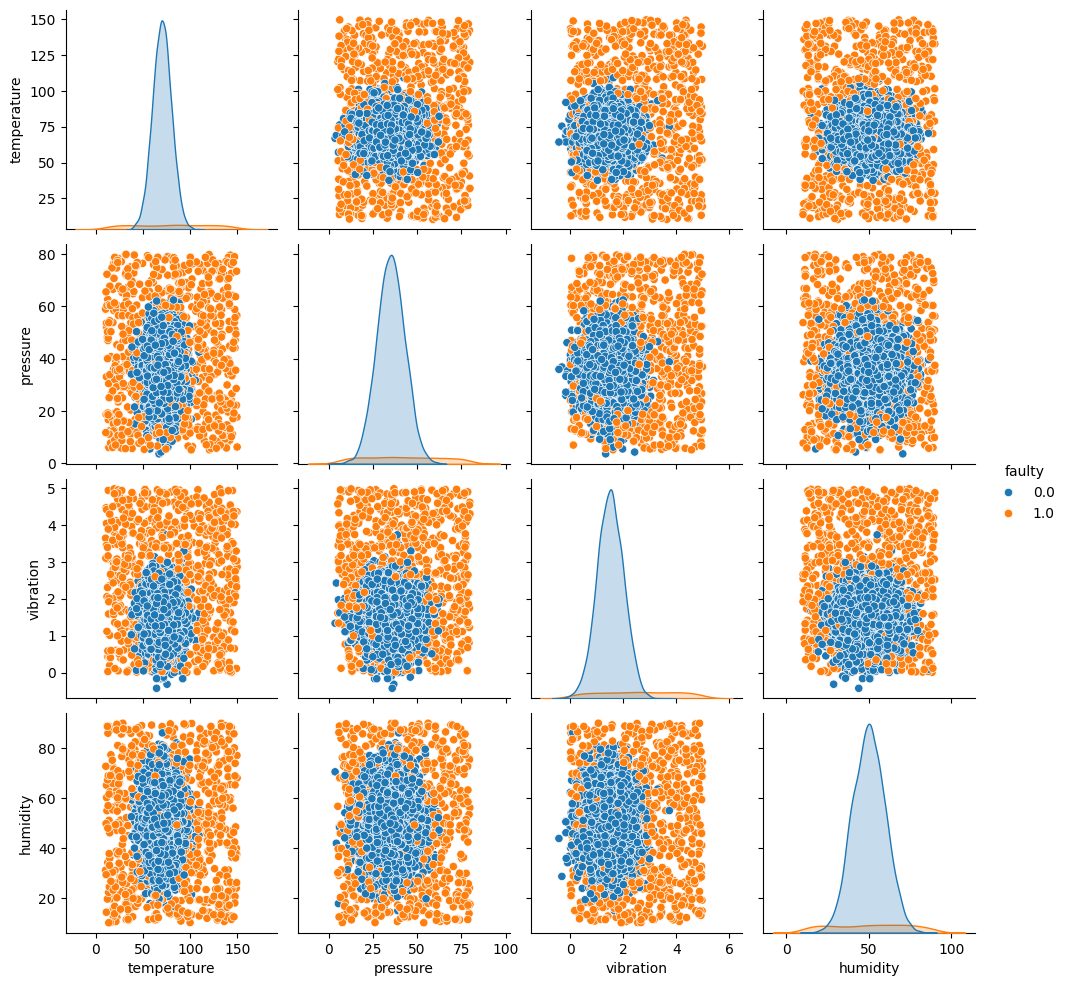

In [ ]:
# Pair plot
sns.pairplot(df, hue='faulty')
plt.show()

SyntaxError: invalid syntax (<ipython-input-17-8784aff26acb>, line 1)

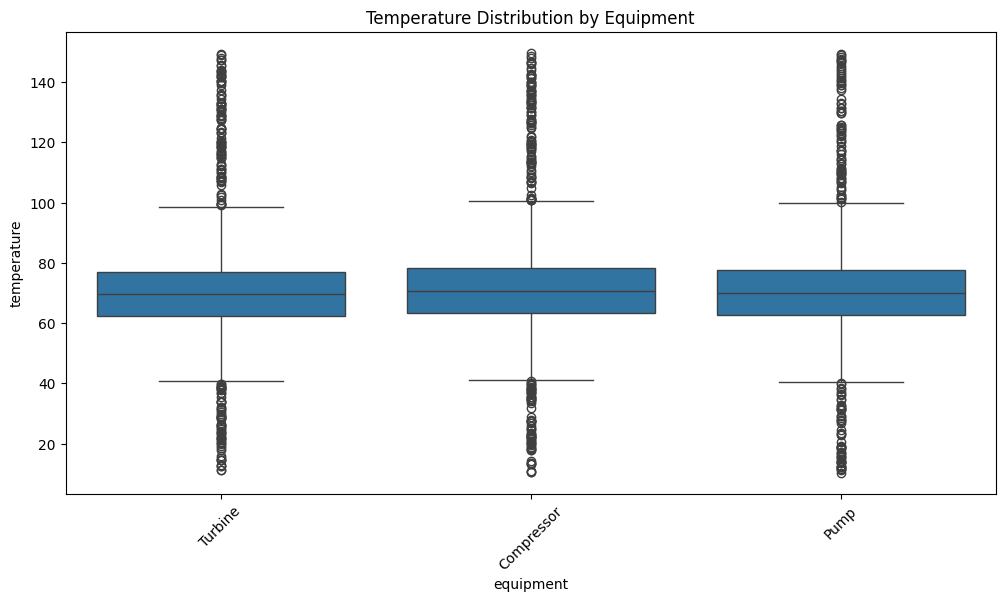

In [ ]:
# Box plot for temperature by equipment
plt.figure(figsize=(12, 6))
sns.boxplot(x='equipment', y='temperature', data=df)
plt.title('Temperature Distribution by Equipment')
plt.xticks(rotation=45)
plt.show()

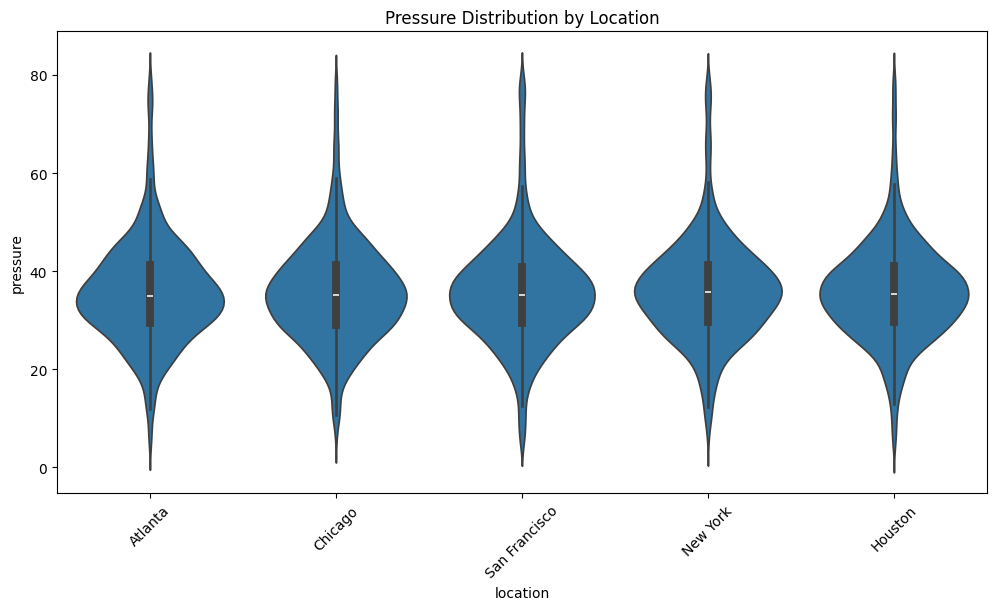

In [ ]:
# Violin plot for pressure by location
plt.figure(figsize=(12, 6))
sns.violinplot(x='location', y='pressure', data=df)
plt.title('Pressure Distribution by Location')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Prepare the data
X = numeric_df.drop(columns=['faulty'])
y = numeric_df['faulty']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Predict anomalies
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# Convert predictions to binary (1 for normal, -1 for anomaly)
y_pred_train = np.where(y_pred_train == 1, 0, 1)
y_pred_test = np.where(y_pred_test == 1, 0, 1)

# Evaluate the model
print('Training Classification Report:')
print(classification_report(y_train, y_pred_train))

print('Testing Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5528
         1.0       0.88      0.89      0.89       609

    accuracy                           0.98      6137
   macro avg       0.94      0.94      0.94      6137
weighted avg       0.98      0.98      0.98      6137

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1377
         1.0       0.93      0.91      0.92       158

    accuracy                           0.98      1535
   macro avg       0.96      0.95      0.95      1535
weighted avg       0.98      0.98      0.98      1535

